# Boiler

In [3]:
import pandas as pd 
import pandasql as ps
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.api as sms

from IPython.display import display
from IPython.display import Markdown as md
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

def f():
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)
    
def nf():
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', 4)

import warnings
warnings.filterwarnings('ignore')

def dp(df, r = 5, c = None):
    from IPython.display import display
    with pd.option_context('display.max_rows', 4, 'display.max_columns', None):
        display(df)

def fg(w = 10, h = 7, dpi = 200):
    plt.rcParams['figure.figsize'] = (w,h)
    plt.rcParams['figure.dpi'] = dpi
fg()

%reload_kedro

2022-03-23 22:44:06,291 - kedro.framework.session.store - INFO - `read()` not implemented for `BaseSessionStore`. Assuming empty store.
2022-03-23 22:44:06,398 - root - INFO - ** Kedro project ames
2022-03-23 22:44:06,399 - root - INFO - Defined global variable `context`, `session`, `catalog` and `pipelines`
2022-03-23 22:44:06,406 - root - INFO - Registered line magic `run_viz`


# Boiler 2

In [5]:
import sklearn

# Load Data

In [6]:
# Import data
data = catalog.load('alldata')

2022-03-23 22:44:23,424 - kedro.io.data_catalog - INFO - Loading data from `alldata` (CSVDataSet)...


# Target var

In [7]:
X = data.drop(['price'], axis = 1)
y = data['price']

# Separate intro train and test

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

In [10]:
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(1271, 81)

(1271,)

(546, 81)

(546,)

In [11]:
train = pd.concat([y_train, X_train], axis = 1)
test = pd.concat([y_test, X_test], axis = 1)

In [12]:
train.shape

(1271, 82)

In [13]:
# Initial visualization
train.sample(5)

,price,Unnamed: 0,PID,area,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,...,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
982,88250,983,40982,1092,160,RM,21.0,1900,Pave,NaN,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
73,392500,74,40073,1652,120,RM,64.0,5587,Pave,NaN,...,0,0,NaN,NaN,NaN,0,11,2008,New,Partial
1672,168000,673,50673,1742,70,RM,121.0,17671,Pave,Grvl,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal
1130,174000,131,50131,1481,60,RL,65.0,8125,Pave,NaN,...,0,0,NaN,NaN,NaN,0,3,2009,WD,Normal
659,243500,660,40659,2495,60,RL,80.0,10791,Pave,NaN,...,0,0,NaN,NaN,NaN,0,3,2010,WD,Normal


# Exploratory train Analysis

 - Visualize a sample from train, to have an idea of what structure we're dealing with

In [14]:
train.sample(5)

,price,Unnamed: 0,PID,area,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,...,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
270,124500,271,40270,816,20,RL,76.0,8314,Pave,NaN,...,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal
765,135000,766,40765,1389,60,RM,60.0,3378,Pave,Grvl,...,0,0,NaN,NaN,NaN,0,9,2009,WD,Normal
348,130000,349,40348,1709,160,RM,24.0,2522,Pave,NaN,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal
1432,114000,433,50433,1232,70,RM,35.0,4571,Pave,Grvl,...,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal
338,137000,339,40338,1551,50,RL,60.0,10890,Pave,NaN,...,0,0,NaN,MnPrv,NaN,0,7,2006,WD,Normal


### Check how many rows and columns there are

- It's possible to see that the train has 1000 rows and 81 columns, that is 81 features, column vectors which can be used to as variables, characteristics to analyze correlations among them and also build prediction models

In [15]:
train.shape

(1271, 82)

## Metadata

- To understand the variables meaning, we must check the train dictionary which is available at the following link:
http://jse.amstat.org/v19n3/decock/trainDocumentation.txt

- From the meaning of PID variable (PID (Nominal): Parcel identification number  - can be used with city web site for parcel review. ) It can be removed from the trainset, as it is not relevant for train analysis correlation and for buildind prediction models

## train types

- What are the variables nature? That is, how many of them are strings or numeric variables and also which ones are categorical (nominal and ordinal) and numeric continuous ones

- From an initial check, there are 27 integer variables, 11 float64 ones and 43 object variables (strings). We can summmarize it as 38 numeric and 43 string features

In [16]:
pd.DataFrame(data = train.dtypes, columns = ['Type']).groupby('Type').agg('size')

Type
int64      28
float64    11
object     43
dtype: int64

- The dictionary avaiable at http://jse.amstat.org/v19n3/decock/trainDocumentation.txt already inform us that:
        
- The train has 82 columns which include 23 nominal, 23 ordinal, 14 discrete, and 20 continuous variables (and 2 additional observation identifiers).


- From the meaning of PID variable (PID (Nominal): Parcel identification number  - can be used with city web site for parcel review. ) It can be removed from the trainset, as it is not relevant for train analysis correlation and for buildind prediction models

In [17]:
data

,Unnamed: 0,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,...,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
0,1,40000,856,126000,30,RL,NaN,7890,Pave,NaN,...,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
1,2,40001,1049,139500,120,RL,42.0,4235,Pave,NaN,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
2,3,40002,1001,124900,30,C (all),60.0,6060,Pave,NaN,...,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
3,4,40003,1039,114000,70,RL,80.0,8146,Pave,NaN,...,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
4,5,40004,1665,227000,60,RL,70.0,8400,Pave,NaN,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,813,50813,848,143750,120,RM,NaN,4435,Pave,NaN,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
1813,814,50814,840,87000,45,RM,55.0,4388,Pave,NaN,...,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal
1814,815,50815,2541,349265,60,RL,98.0,12328,Pave,NaN,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1815,816,50816,1682,174000,20,RL,80.0,10400,Pave,NaN,...,0,0,NaN,MnPrv,NaN,0,5,2008,WD,Normal


In [18]:
train

,price,Unnamed: 0,PID,area,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,...,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
837,130000,838,40837,864,20,RL,62.0,7130,Pave,NaN,...,0,0,NaN,GdPrv,NaN,0,6,2009,WD,Normal
311,149500,312,40311,1400,60,RL,74.0,7844,Pave,NaN,...,0,0,NaN,NaN,NaN,0,3,2006,WD,Normal
1414,145900,415,50415,2200,90,RL,67.0,8777,Pave,NaN,...,0,0,NaN,GdPrv,NaN,0,9,2008,WD,Normal
947,139500,948,40947,1022,20,RL,NaN,14217,Pave,NaN,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1009,255000,10,50010,2422,20,RL,102.0,12671,Pave,NaN,...,144,0,NaN,NaN,NaN,0,7,2007,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1198,132000,199,50199,934,80,RL,80.0,10366,Pave,NaN,...,0,0,NaN,GdPrv,Shed,500,7,2006,WD,Normal
1156,166000,157,50157,1392,20,RL,80.0,11900,Pave,NaN,...,192,0,NaN,NaN,NaN,0,6,2008,WD,Normal
1695,284000,696,50696,1575,20,RL,92.0,10845,Pave,NaN,...,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal
126,112000,127,40126,808,20,RL,50.0,5175,Pave,NaN,...,0,0,NaN,NaN,NaN,0,7,2007,COD,Normal


In [19]:
del train['PID']
del train['Unnamed: 0']


# Missing Values Treatment

### Total number of missing values

In [20]:
pd.options.display.max_rows = 81

In [21]:
train.isnull().sum()

price                 0
area                  0
MS.SubClass           0
MS.Zoning             0
Lot.Frontage        223
Lot.Area              0
Street                0
Alley              1185
Lot.Shape             0
Land.Contour          0
Utilities             0
Lot.Config            0
Land.Slope            0
Neighborhood          0
Condition.1           0
Condition.2           0
Bldg.Type             0
House.Style           0
Overall.Qual          0
Overall.Cond          0
Year.Built            0
Year.Remod.Add        0
Roof.Style            0
Roof.Matl             0
Exterior.1st          0
Exterior.2nd          0
Mas.Vnr.Type          7
Mas.Vnr.Area          7
Exter.Qual            0
Exter.Cond            0
Foundation            0
Bsmt.Qual            31
Bsmt.Cond            31
Bsmt.Exposure        32
BsmtFin.Type.1       31
BsmtFin.SF.1          0
BsmtFin.Type.2       31
BsmtFin.SF.2          0
Bsmt.Unf.SF           0
Total.Bsmt.SF         0
Heating               0
Heating.QC      

In [22]:
train.isnull().sum().sum()

5961

• There are columns in which almost every row is filled with NA values

In [23]:
Missingtrain = pd.DataFrame(train.isnull().sum(), columns = ['Missing']).sort_values(by = 'Missing', ascending = False).head(30)
Missingtrain

,Missing
Pool.QC,1268
Misc.Feature,1234
Alley,1185
Fence,1013
Fireplace.Qu,588
Lot.Frontage,223
Garage.Cond,56
Garage.Qual,56
Garage.Finish,56
Garage.Yr.Blt,56


### Visualize missing percentage do define a criteria to cut off some columns

In [24]:
Missingtrain['Missing Percentage (%)'] = Missingtrain['Missing']/train.shape[0]*100
Missingtrain.head(30)

,Missing,Missing Percentage (%)
Pool.QC,1268,99.763965
Misc.Feature,1234,97.088906
Alley,1185,93.233674
Fence,1013,79.701023
Fireplace.Qu,588,46.262785
Lot.Frontage,223,17.545240
Garage.Cond,56,4.405980
Garage.Qual,56,4.405980
Garage.Finish,56,4.405980
Garage.Yr.Blt,56,4.405980



### Detailed analysis of which variables to drop

- The initial criteria will be variables with more than 10 % of missing values to be dropped

• Pool.QC : 

    The NA does not mean missing value, but "No Pool", that is, the house does not have a pool inside of it, so this one will not be initially dropped

• Misc.Feature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
       
  The diverse nature of this variable allows it to be dropped
  
• Alley (Nominal): Type of alley access to property
    
    NA does not represent a Missing Value, but "No alley access". Variable will remain in the trainset
    
• Fence (Ordinal): Fence quality 
    
    NA stands for "No Fence". Keeping the variable
    
• Fireplace.Qu	

    NA stands for "No Fireplace". Variable stays
    
• Lot Frontage (Continuous): Linear feet of street connected to property

    NA really stands for Missing Value, as it is above the predetermined criteria value, it will be dropped
    
- The other variables have less than 10 % of missing values, so they will stay and impute methods to fill them will be assessed

In [25]:
# Delete Lot Frontage feature

train.drop(columns = ['Lot.Frontage','Misc.Feature'], axis = 1, inplace = True)

## Check if it is necessary to impute values into missing values cells

- Variables:

• Year Garage was built: It is not missing value, since lookign at Garage.Qual and Garage.Cond we can infer that the real meaning is that the house has no Garage

• Bsmt.* variables tell us if the house has or not a basement

• Mas Vnr Type (Nominal): Masonry veneer type

    It is not made of Masonry type, therefore it is not a missing value
    
- Other variables have only one NA, which represents 0,1 % of missing values, so they will be kept in the trainset without further treatments

- The analysis tell us that is not necessary to treat missing values, because most of the NA do represent another valuable characteristic to our analysis
    
    

# Nominal variables treatment

- The nominal variables will be transformed to dummy variables (One Hot Encoding)

In [26]:
prefix = ['MS.SubClass','MS.Zoning','Street','Alley',
'Land.Contour','Lot.Config','Neighborhood','Condition.1',
'Condition.2','Bldg.Type','House.Style','Roof.Style',
'Roof.Matl','Exterior.1st','Exterior.2nd','Mas.Vnr.Type',
'Foundation','Heating','Central.Air','Garage.Type','Sale.Type','Sale.Condition']

In [27]:
train[prefix]

,MS.SubClass,MS.Zoning,Street,Alley,Land.Contour,Lot.Config,Neighborhood,Condition.1,Condition.2,Bldg.Type,...,Roof.Matl,Exterior.1st,Exterior.2nd,Mas.Vnr.Type,Foundation,Heating,Central.Air,Garage.Type,Sale.Type,Sale.Condition
837,20,RL,Pave,NaN,Lvl,Inside,NAmes,Norm,Norm,1Fam,...,CompShg,HdBoard,HdBoard,None,PConc,GasA,Y,Attchd,WD,Normal
311,60,RL,Pave,NaN,Lvl,Inside,Sawyer,Norm,Norm,1Fam,...,CompShg,HdBoard,HdBoard,BrkFace,CBlock,GasA,Y,Attchd,WD,Normal
1414,90,RL,Pave,NaN,Lvl,Inside,Edwards,Feedr,Norm,Duplex,...,CompShg,MetalSd,MetalSd,None,CBlock,GasA,Y,NaN,WD,Normal
947,20,RL,Pave,NaN,Lvl,CulDSac,CollgCr,Norm,Norm,1Fam,...,CompShg,VinylSd,VinylSd,None,PConc,GasA,Y,Detchd,WD,Normal
1009,20,RL,Pave,NaN,Lvl,Corner,ClearCr,Norm,Norm,1Fam,...,CompShg,MetalSd,MetalSd,Stone,CBlock,GasA,Y,Attchd,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1198,80,RL,Pave,NaN,Lvl,Corner,Sawyer,Norm,Norm,1Fam,...,CompShg,HdBoard,Plywood,None,CBlock,GasA,Y,Attchd,WD,Normal
1156,20,RL,Pave,NaN,Lvl,Corner,NAmes,Norm,Norm,1Fam,...,CompShg,HdBoard,HdBoard,BrkFace,CBlock,GasA,Y,Attchd,WD,Normal
1695,20,RL,Pave,NaN,Lvl,Corner,NridgHt,Norm,Norm,1Fam,...,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,Attchd,WD,Normal
126,20,RL,Pave,NaN,Lvl,Inside,BrkSide,RRAn,Feedr,1Fam,...,CompShg,VinylSd,VinylSd,None,CBlock,GasA,Y,Detchd,COD,Normal


- Return unique values to join nominal_vars prefix

In [28]:
# MS.SubClass a qual é uma variável nominal está como int644, mas precisa estar como object string
train[prefix].dtypes

MS.SubClass        int64
MS.Zoning         object
Street            object
Alley             object
Land.Contour      object
Lot.Config        object
Neighborhood      object
Condition.1       object
Condition.2       object
Bldg.Type         object
House.Style       object
Roof.Style        object
Roof.Matl         object
Exterior.1st      object
Exterior.2nd      object
Mas.Vnr.Type      object
Foundation        object
Heating           object
Central.Air       object
Garage.Type       object
Sale.Type         object
Sale.Condition    object
dtype: object

In [29]:
train['MS.SubClass'] = train['MS.SubClass'].astype(str) 

In [30]:
df_nominal = pd.get_dummies(data = train[prefix])

In [31]:
pd.options.display.max_rows = 10

In [32]:
df_nominal

,MS.SubClass_120,MS.SubClass_160,MS.SubClass_180,MS.SubClass_190,MS.SubClass_20,MS.SubClass_30,MS.SubClass_40,MS.SubClass_45,MS.SubClass_50,MS.SubClass_60,...,Sale.Type_ConLw,Sale.Type_New,Sale.Type_Oth,Sale.Type_WD,Sale.Condition_Abnorml,Sale.Condition_AdjLand,Sale.Condition_Alloca,Sale.Condition_Family,Sale.Condition_Normal,Sale.Condition_Partial
837,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
311,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1414,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
947,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1009,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1156,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1695,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
126,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Separate numeric and nominal
 -Start to separating and creating a numeric and nominal categorical trainframes

In [33]:
df_numeric = train.drop(columns = prefix, axis = 1)

## Remap ordinal variables 

- Here, did not used One Hot Encoder since it could not automatically attribute the ordinal relationship in a correct way, so, every dictionary to remap the features were manually typed

In [34]:
pd.options.display.max_rows = 10

In [35]:
df_numeric['Bsmt.Qual']

837     TA
311     TA
1414    TA
947     Gd
1009    Gd
        ..
1198    TA
1156    TA
1695    Gd
126     TA
1032    TA
Name: Bsmt.Qual, Length: 1271, dtype: object

In [36]:
LotShape = {'Reg':3,'IR1':2,'IR2':1,'IR3':0}
Utilities = {'AllPub':3,'NoSewr':2,'NoSewa':1,'ELO':0}
LandSlope = {'Gtl':2,'Mod':1,'Sev':0}
ExterQual = {'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0}
ExterCond = ExterQual # They're the same values 
BsmtQual = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,np.nan:0}
BsmtCond = BsmtQual
BsmtExposure = {'Gd':4,'Av':3,'Mn':2,'No':1, np.nan:0}
BsmtFinType1 = {'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,np.nan:0}
BsmtFinType2 = BsmtFinType1
HeatingQC = ExterQual
Electrical = {'SBrkr':4,'FuseA':3,'FuseF':2,'FuseP':1,'Mix':0}
KitchenQual = ExterQual
Functional = {'Typ':7,'Min1':6,'Min2':5,'Mod':4,'Maj1':3,'Maj2':2,'Sev':1,'Sal':0}
FireplaceQu = BsmtQual
GarageFinish = {'Fin':3,'RFn':2,'Unf':1,np.nan:0}
GarageQual = BsmtQual
GarageCond = BsmtQual
PavedDrive = {'Y':2,'P':1,'N':0}
PoolQC = {'Ex':4,'Gd':3,'TA':2,'Fa':1,np.nan:0}
Fence = {'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1,np.nan:0}

In [37]:
ordinal_dict = {'Lot.Shape':LotShape,
                'Utilities':Utilities,
                'Land.Slope':LandSlope,
                'Exter.Qual':ExterQual,
                'Exter.Cond':ExterCond,
                'Bsmt.Qual':BsmtQual,
                'Bsmt.Cond':BsmtCond,
                'Bsmt.Exposure':BsmtExposure,
                'BsmtFin.Type.1':BsmtFinType1,
                'BsmtFin.Type.2':BsmtFinType2,
                'Heating.QC':HeatingQC,
                'Electrical':Electrical,
                'Kitchen.Qual':KitchenQual,
                'Functional':Functional,
                'Fireplace.Qu':FireplaceQu,
                'Garage.Finish':GarageFinish,
                'Garage.Qual':GarageQual,
                'Garage.Cond':GarageCond,
                'Paved.Drive':PavedDrive,
                'Pool.QC':PoolQC,
                'Fence':Fence}

In [38]:
ordinal_vars = list(ordinal_dict.keys())

In [39]:
ordinal_vars

['Lot.Shape',
 'Utilities',
 'Land.Slope',
 'Exter.Qual',
 'Exter.Cond',
 'Bsmt.Qual',
 'Bsmt.Cond',
 'Bsmt.Exposure',
 'BsmtFin.Type.1',
 'BsmtFin.Type.2',
 'Heating.QC',
 'Electrical',
 'Kitchen.Qual',
 'Functional',
 'Fireplace.Qu',
 'Garage.Finish',
 'Garage.Qual',
 'Garage.Cond',
 'Paved.Drive',
 'Pool.QC',
 'Fence']

In [40]:
# Yet Untransformed with string values
df_numeric

,price,area,Lot.Area,Lot.Shape,Utilities,Land.Slope,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,...,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Val,Mo.Sold,Yr.Sold
837,130000,864,7130,Reg,AllPub,Gtl,5,6,1967,1967,...,0,0,0,0,0,NaN,GdPrv,0,6,2009
311,149500,1400,7844,Reg,AllPub,Gtl,6,7,1978,1978,...,0,0,0,0,0,NaN,NaN,0,3,2006
1414,145900,2200,8777,Reg,AllPub,Gtl,5,7,1900,2003,...,70,0,0,0,0,NaN,GdPrv,0,9,2008
947,139500,1022,14217,IR2,AllPub,Gtl,5,5,1994,1994,...,0,0,0,0,0,NaN,NaN,0,8,2007
1009,255000,2422,12671,IR1,AllPub,Gtl,6,7,1954,1994,...,63,0,0,144,0,NaN,NaN,0,7,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1198,132000,934,10366,IR1,AllPub,Gtl,6,7,1964,1964,...,0,0,0,0,0,NaN,GdPrv,500,7,2006
1156,166000,1392,11900,IR1,AllPub,Gtl,6,5,1957,1957,...,0,0,0,192,0,NaN,NaN,0,6,2008
1695,284000,1575,10845,IR1,AllPub,Gtl,8,5,2003,2004,...,28,0,0,0,0,NaN,NaN,0,6,2008
126,112000,808,5175,Reg,AllPub,Gtl,5,8,1958,2000,...,0,0,0,0,0,NaN,NaN,0,7,2007


In [41]:
df_numeric.isnull().sum().sum()

3256

## Remapping, replacing the values

In [42]:
df_numeric.replace(ordinal_dict, inplace = True)

In [43]:
# Visualizing after remapping process
df_numeric[ordinal_vars]

,Lot.Shape,Utilities,Land.Slope,Exter.Qual,Exter.Cond,Bsmt.Qual,Bsmt.Cond,Bsmt.Exposure,BsmtFin.Type.1,BsmtFin.Type.2,...,Electrical,Kitchen.Qual,Functional,Fireplace.Qu,Garage.Finish,Garage.Qual,Garage.Cond,Paved.Drive,Pool.QC,Fence
837,3,3,2,2,2,3,3,1,4,1,...,4,2,7,0,3,3,3,2,0,4
311,3,3,2,2,2,3,3,1,5,1,...,4,2,7,3,3,3,3,2,0,0
1414,3,3,2,2,2,3,3,1,5,1,...,4,2,7,0,0,0,0,0,0,4
947,1,3,2,2,2,4,3,1,5,1,...,4,2,7,0,1,3,3,2,0,0
1009,2,3,2,2,3,4,2,1,2,1,...,4,3,5,4,3,3,3,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1198,2,3,2,2,3,3,3,3,6,1,...,4,2,7,0,1,3,3,2,0,4
1156,2,3,2,2,2,3,3,1,3,1,...,3,2,7,4,2,3,3,2,0,0
1695,2,3,2,3,2,4,3,2,6,1,...,4,3,7,3,3,3,3,2,0,0
126,3,3,2,2,2,3,3,1,4,5,...,4,2,7,0,1,3,3,0,0,0


In [44]:
df_numeric.isnull().sum().sum()

63

In [45]:
pd.options.display.max_rows = None

In [46]:
df_numeric.isnull().sum()

price               0
area                0
Lot.Area            0
Lot.Shape           0
Utilities           0
Land.Slope          0
Overall.Qual        0
Overall.Cond        0
Year.Built          0
Year.Remod.Add      0
Mas.Vnr.Area        7
Exter.Qual          0
Exter.Cond          0
Bsmt.Qual           0
Bsmt.Cond           0
Bsmt.Exposure       0
BsmtFin.Type.1      0
BsmtFin.SF.1        0
BsmtFin.Type.2      0
BsmtFin.SF.2        0
Bsmt.Unf.SF         0
Total.Bsmt.SF       0
Heating.QC          0
Electrical          0
X1st.Flr.SF         0
X2nd.Flr.SF         0
Low.Qual.Fin.SF     0
Bsmt.Full.Bath      0
Bsmt.Half.Bath      0
Full.Bath           0
Half.Bath           0
Bedroom.AbvGr       0
Kitchen.AbvGr       0
Kitchen.Qual        0
TotRms.AbvGrd       0
Functional          0
Fireplaces          0
Fireplace.Qu        0
Garage.Yr.Blt      56
Garage.Finish       0
Garage.Cars         0
Garage.Area         0
Garage.Qual         0
Garage.Cond         0
Paved.Drive         0
Wood.Deck.

In [47]:
pd.options.display.max_rows = 10

In [48]:
df_numeric[df_numeric.isnull().any(axis = 1)]

,price,area,Lot.Area,Lot.Shape,Utilities,Land.Slope,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,...,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Val,Mo.Sold,Yr.Sold
1414,145900,2200,8777,3,3,2,5,7,1900,2003,...,70,0,0,0,0,0,4,0,9,2008
1743,96000,1137,8050,3,3,2,5,8,1947,1993,...,0,0,0,0,0,0,0,0,4,2008
1718,118000,1594,11426,3,3,2,4,6,1910,1996,...,172,109,0,0,0,0,0,0,6,2008
768,72000,819,9000,3,3,2,5,4,1919,1950,...,0,0,0,0,0,0,0,0,9,2006
93,118000,1440,12108,3,3,2,4,4,1955,1955,...,0,0,0,0,0,0,0,0,9,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,123600,990,8070,3,3,2,4,5,1994,1995,...,0,0,0,0,0,0,0,0,8,2007
1407,64500,1020,4761,3,3,2,3,3,1918,1950,...,0,105,0,0,0,0,0,0,10,2006
123,127000,1355,6882,3,3,2,6,7,1914,2006,...,0,115,0,0,0,0,0,0,3,2007
1747,128950,1225,9320,2,3,2,4,5,1959,1959,...,0,0,0,0,0,0,0,400,1,2010


In [49]:
# Check if there are only numerical variables (should be only numerical, as int64 and float64)
pd.DataFrame(df_numeric.dtypes, columns = ['Type']).groupby(by = 'Type').agg('size')

Type
int64      46
float64    10
dtype: int64

# Pearson Correlation Coefficients

In [50]:
corr_matrix = df_numeric.corr(method = 'pearson')

In [51]:
# Create a table to see the highest correlations
corr_table = corr_matrix.stack().reset_index()

In [52]:
corr_table.rename(columns = {'level_0':'Var1','level_1':'Var2',0:'Corr'}, inplace = True)

In [53]:
# Remove perfect correlation with the same variable, which is irrelevant
corr_table = corr_table[corr_table['Corr'] != 1]

In [54]:
pd.options.display.max_rows = 10

In [55]:
# Here it is possible to visualize the variables with the highest pearson correlation coefficients
corr_table.sort_values(by = 'Corr', ascending = False)

,Var1,Var2,Corr
2351,Garage.Cond,Garage.Qual,0.944314
2297,Garage.Qual,Garage.Cond,0.944314
2799,Pool.QC,Pool.Area,0.938116
2745,Pool.Area,Pool.QC,0.938116
2239,Garage.Area,Garage.Cars,0.887633
...,...,...,...
1449,Bsmt.Full.Bath,Bsmt.Unf.SF,-0.404954
391,Year.Built,Overall.Cond,-0.426189
337,Overall.Cond,Year.Built,-0.426189
1061,Bsmt.Unf.SF,BsmtFin.SF.1,-0.487620


# The highest correlation coefficients with the Price

In [56]:
corr_price_num = pd.DataFrame(df_numeric.corr().price.sort_values(ascending = False))

In [57]:
pd.options.display.max_rows = 15

In [58]:
corr_price_num['price'] = round(corr_price_num['price'],2)

In [59]:
corr_price_num.drop('price', axis = 0, inplace = True)

In [60]:
pd.options.display.max_rows = 30

In [61]:
corr_price_num.head(30)

,price
Overall.Qual,0.79
area,0.73
Exter.Qual,0.70
Total.Bsmt.SF,0.67
Kitchen.Qual,0.67
X1st.Flr.SF,0.66
Garage.Cars,0.65
Garage.Area,0.64
Bsmt.Qual,0.60
Year.Built,0.56


- The Overal Quality of a house has a Pearson Correlation Coefficient of 0.80. This value can be considered high, and the relationship between those variables can be better seen in a Boxplot graph, as follows:

In [62]:
OverallQual = {10:'Very Excellent',
               9:'Excellent',
               8:'Very Good',
               7:'Good',
               6:'Above Average',
               5:'Average',
               4:'Below Average',
               3:'Fair',
               2:'Poor',
               1:'Very Poor'}

In [63]:
df_num_plot = df_numeric.copy()
df_num_plot['Overall.Qual'] = df_num_plot['Overall.Qual'].map(OverallQual)

In [64]:
categories = list(OverallQual.values())

In [65]:
df_num_plot['Overall.Qual'] = df_num_plot['Overall.Qual'].astype('category')

In [66]:
df_num_plot['Overall.Qual'].cat.reorder_categories(new_categories = categories[::-1],
                                                  ordered = True, inplace = True)

ValueError: items in new_categories are not the same as in old categories

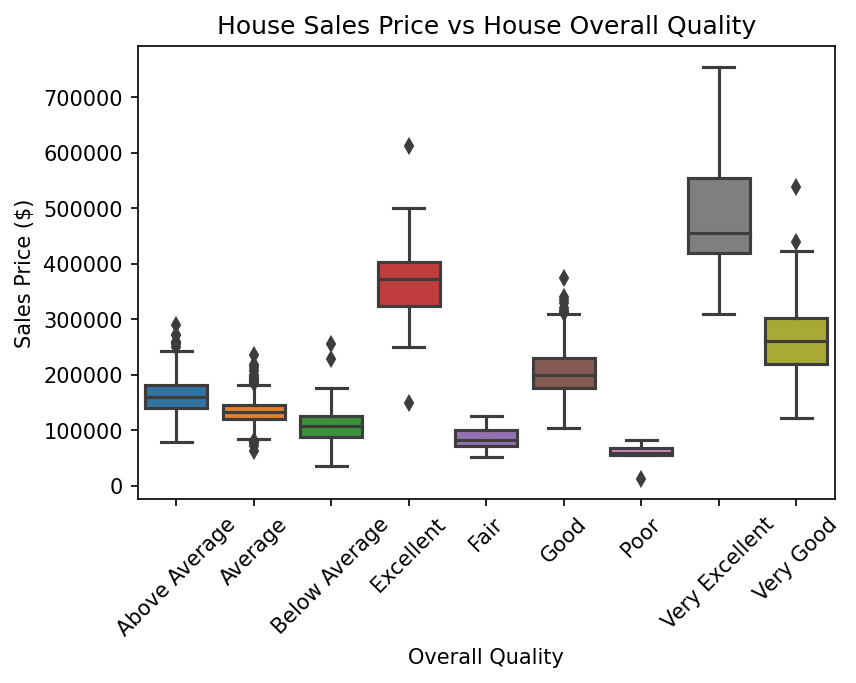

In [67]:
plt.figure(figsize = (6,4), dpi = 150);
sns.boxplot(y = 'price', x = 'Overall.Qual', data = df_num_plot);
plt.title('House Sales Price vs House Overall Quality');
plt.ylabel(ylabel = 'Sales Price ($)');
plt.xlabel(xlabel = 'Overall Quality');
plt.xticks(rotation = 45);
plt.show();

In [68]:
ExterQual_inv = {4:'Excellent',
                 3:'Good',
                 2:'Average/Typical',
                 1:'Fair',
                 0:'Poor'}

In [69]:
df_num_plot['Exter.Qual'] = df_num_plot['Exter.Qual'].map(ExterQual_inv)


In [70]:
df_num_plot['Exter.Qual'] = df_num_plot['Exter.Qual'].astype('category');

In [71]:
df_num_plot['Exter.Qual']

837     Average/Typical
311     Average/Typical
1414    Average/Typical
947     Average/Typical
1009    Average/Typical
             ...       
1198    Average/Typical
1156    Average/Typical
1695               Good
126     Average/Typical
1032    Average/Typical
Name: Exter.Qual, Length: 1271, dtype: category
Categories (4, object): ['Average/Typical', 'Excellent', 'Fair', 'Good']

In [72]:
ExterQual_cat = ['Excellent','Good','Average/Typical','Fair']

In [73]:
ExterQual_cat[::1]

['Excellent', 'Good', 'Average/Typical', 'Fair']

In [74]:
df_num_plot['Exter.Qual'].cat.reorder_categories(new_categories = ExterQual_cat[::-1],
                                                  ordered = True, inplace = True)

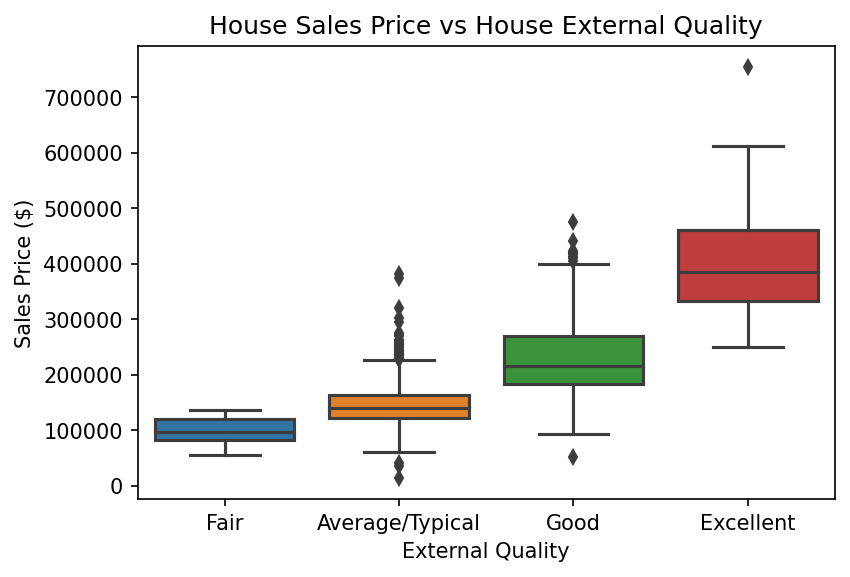

In [75]:
plt.figure(figsize = (6,4), dpi = 150);
sns.boxplot(x = 'Exter.Qual', y = 'price', data = df_num_plot);
plt.title('House Sales Price vs House External Quality');
plt.xlabel('External Quality');
plt.ylabel(ylabel = 'Sales Price ($)');
plt.show();

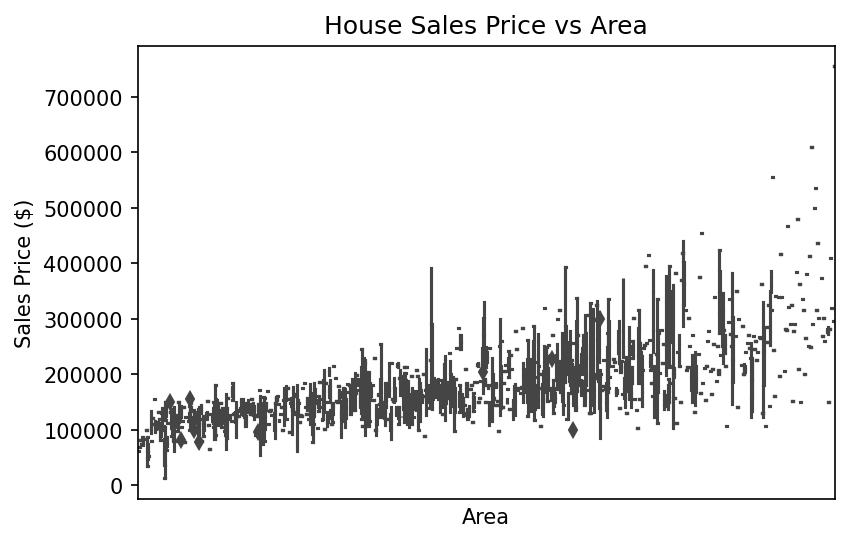

In [76]:
plt.figure(figsize = (6,4), dpi = 150);
sns.boxplot(x = 'area', y = 'price', data = df_num_plot);
plt.title('House Sales Price vs Area');
plt.xlabel('Area');
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.ylabel(ylabel = 'Sales Price ($)');
plt.show();

# Bisserial Correlation Coefficient

In [77]:
df_numeric['ID'] = df_numeric.index
df_nominal['ID'] = df_nominal.index

In [78]:
# Merge trainsets
df_numeric_nominal = pd.merge(df_numeric, df_nominal, on = 'ID')

In [79]:
df_numeric_nominal.dtypes.value_counts()

uint8      164
int64       47
float64     10
dtype: int64

In [80]:
# Merged
df_numeric_nominal.shape

(1271, 221)

# Test data

- Load testing train because the training train can only contain the same variables as the testing one

In [81]:
test = pd.read_csv('ames_test.csv', sep = ',')

# drop first column
del test['Unnamed: 0']

del test['PID']

test.drop(columns = ['Lot.Frontage','Misc.Feature'], axis = 1, inplace = True)

test['MS.SubClass'] = test['MS.SubClass'].astype(str)

df_nominal_test = pd.get_dummies(train = test[prefix])

test_nom_vars = list(df_nominal_test)

FileNotFoundError: [Errno 2] No such file or directory: 'ames_test.csv'

In [ ]:
# Training trainset nominal vars
nominal_vars = list(df_nominal.columns)

## Take only the intersecction of nominal_vars and test_nom_vars

In [ ]:
nominal_vars = list(set(nominal_vars) & set(test_nom_vars))

In [ ]:
# Import the stats which contains the pointbiserialr function
from scipy import stats

In [ ]:
# List which returns the calculated coefficients
corr_biserial = [stats.pointbiserialr(x = df_numeric_nominal[nominal_var], y = df_numeric_nominal['price']) for nominal_var in nominal_vars]

In [ ]:
# Manipulate it with a trainframe
df_biserial = pd.trainFrame(train = corr_biserial)

In [ ]:
# Attribute the nominal_vars names 
df_biserial['Var'] = nominal_vars

### Remove correlations with pvalue less than 0.05

In [ ]:
df_biserial = df_biserial[df_biserial['pvalue'] < 0.05]

In [ ]:
df_biserial.sort_values(by = 'correlation', ascending = False)

In [ ]:
plt.figure(figsize = (6,4), dpi = 150)
sns.boxplot(x = 'Foundation_PConc', y = 'price', train = df_numeric_nominal)
plt.title('House Sales Price variation due to the \n presense or not of a Foundation of Poured Concrete')
plt.xlabel('Foundation of Poured Concrete')
plt.xticks([0,1],['No','Yes'])
plt.ylabel('Sales Price ($)')
plt.show()

In [ ]:
plt.figure(figsize = (6,4), dpi = 150)
sns.boxplot(x = 'Mas.Vnr.Type_None', y = 'price', train = df_numeric_nominal)
plt.title('House Sales Price variation due to the \n Mansonry Venner Type')
plt.xlabel('Mansonry Venner Type \n \n  No: No material defined \n Yes: Commom Brick, Brick Face, Cinder Block or Stone')
plt.xticks([0,1],['No','Yes'])
plt.ylabel('Sales Price ($)')
plt.show()


# ------------------------------------------------------------------------------------------------------------ 

# Exploratory train Analysis Summary

From the developed EDA here presented, it was possible to determine which are the main variables correlated with the House Sale Prices. Some of those variables are numeric and some nominal ( which were converted to binary variables)

### The first 10 numeric variables most correlated are:

Overall Material and Finish of the house	(0.80) 

Quality of the material on the exterior	    (0.72)

area                                        (0.71)

Kitchen                                  	(0.69)

Total square feet of basement area      	(0.69)

First Floor Square Feet             	    (0.68)

Size of garage in car capacity       	    (0.66)

Garage area                                 (0.65)

Basement Quality                     	    (0.62)

Original Construction date           	    (0.58)

### The first 5 main correlations of price with nominal variables are as follows:

Whether or not the Foundation is made of concrete        (0.54)
If the house is located at Northridge Heights            (0.46)
Second material covering the house being Vinyl Siding    (0.37)
First Material covering the house being Vinyl Siding     (0.37)
Garage attached to home                                  (0.36)

# -------------------------------------------------------------------------------------------------------------

# Optional Assignment - Predicting house prices

In building a model, it is often useful to start by creating a simple, intuitive initial model based on the results of the exploratory train analysis. 

You may feel like showcasing more advanced statistical skills. For this reason, we are providing testing train on *ames_test* train set so you can build a very simple model in order to predict the house prices given the train available on training train set. Use your imagination and let 

Note: The goal is not to identify the “best” possible model but rather to choose a reasonable and understandable starting point.

## Select the numeric predictors with higher Pearson Correlation Coefficients, above 0.6

In [82]:
corr_price_num['price_abs'] = abs(corr_price_num['price'])

In [83]:
# Variables which will be used in the predictor model 
num_vars = list(corr_price_num[corr_price_num['price_abs'] > 0.6].index)

In [84]:
num_vars

['Overall.Qual',
 'area',
 'Exter.Qual',
 'Total.Bsmt.SF',
 'Kitchen.Qual',
 'X1st.Flr.SF',
 'Garage.Cars',
 'Garage.Area']

In [85]:
df_train = df_numeric_nominal

## Select the nominal predictors with higher Bisserial Correlation Coefficient, above 0.3

# Load testing train because the training train can only contain the same variables as the testing one

In [86]:
df_biserial['corr_abs'] = abs(df_biserial['correlation'])

NameError: name 'df_biserial' is not defined

In [87]:
df_biserial.sort_values(by = 'corr_abs', ascending = False)

NameError: name 'df_biserial' is not defined

In [88]:
nom_vars = list(df_biserial[df_biserial['corr_abs']> 0.3]['Var'])

NameError: name 'df_biserial' is not defined

In [89]:
pred_vars = num_vars + nom_vars + ['price']

NameError: name 'nom_vars' is not defined

In [101]:
pred_vars

['Overall.Qual',
 'Exter.Qual',
 'area',
 'Kitchen.Qual',
 'Total.Bsmt.SF',
 'X1st.Flr.SF',
 'Garage.Cars',
 'Garage.Area',
 'Bsmt.Qual',
 'Exterior.2nd_VinylSd',
 'Foundation_PConc',
 'MS.Zoning_RM',
 'Garage.Type_Attchd',
 'Foundation_CBlock',
 'Neighborhood_NridgHt',
 'Mas.Vnr.Type_None',
 'Garage.Type_Detchd',
 'MS.SubClass_60',
 'Exterior.1st_VinylSd',
 'price']

In [102]:
df_pred = df_numeric_nominal[pred_vars]

# Last Missing Values treatment

In [103]:
df_pred.isnull().sum().sum()

3

#### Only three missing values which must me treated at this point of the pipeline

In [104]:
pd.trainFrame(df_pred.isnull().sum()).sort_values(by = 0, ascending = False)

,0
Total.Bsmt.SF,1
Garage.Cars,1
Garage.Area,1
Overall.Qual,0
Garage.Type_Attchd,0
Exterior.1st_VinylSd,0
MS.SubClass_60,0
Garage.Type_Detchd,0
Mas.Vnr.Type_None,0
Neighborhood_NridgHt,0


In [105]:
df_pred.dropna(inplace = True)

<ipython-input-105-000eeaaecbb4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred.dropna(inplace = True)


In [106]:
df_pred.isnull().sum().sum()

0

# Model Testing

## Linear Regression

In [107]:
import statsmodels.api as sm

In [108]:
X_var = list(df_pred.drop('price', axis =1))
y_var = 'price'

In [109]:
(X_var, y_var)

(['Overall.Qual',
  'Exter.Qual',
  'area',
  'Kitchen.Qual',
  'Total.Bsmt.SF',
  'X1st.Flr.SF',
  'Garage.Cars',
  'Garage.Area',
  'Bsmt.Qual',
  'Exterior.2nd_VinylSd',
  'Foundation_PConc',
  'MS.Zoning_RM',
  'Garage.Type_Attchd',
  'Foundation_CBlock',
  'Neighborhood_NridgHt',
  'Mas.Vnr.Type_None',
  'Garage.Type_Detchd',
  'MS.SubClass_60',
  'Exterior.1st_VinylSd'],
 'price')

In [110]:
y_train = df_pred[y_var].to_numpy()

In [111]:
X_train = df_pred[X_var].to_numpy() 

In [112]:
# endog variable : dependent variable 
# exog variables: we do not control them, that is why this name
lm = sm.regression.linear_model.OLS(endog = y_train, exog = X_train)

In [113]:
lm_result = lm.fit()

In [114]:
lm_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                              1507.
Date:                Sat, 27 Feb 2021   Prob (F-statistic):                        0.00
Time:                        08:45:53   Log-Likelihood:                         -11891.
No. Observations:                 998   AIC:                                  2.382e+04
Df Residuals:                     979   BIC:                                  2.391e+04
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1.082e+04   1531.905      7.063      0.000    7813.281    1.38e+04
x2          5888.7813   3385.557      1.739      0.082    -755.001    1.25e+04
x3            33.1031      4.483      7.385      0.000      24.306      41.900
x4          8180.9274   2767.881      2.956      0.003    2749.266    1.36e+04
x5            41.6428      5.886      7.075      0.000      30.093      53.193
x6             1.5044      7.464      0.202      0.840     -13.142      16.151
x7          -781.8608   3807.619     -0.205      0.837   -8253.895    6690.174
x8            53.2667     12.755      4.176      0.000      28.236      78.298
x9         -1688.8435   2106.986     -0.802      0.423   -5823.573    2445.886
x10         2.139e+04   1.19e+04      1.793      0.073   -2023.764    4.48e+04
x11        -8694.5804   5108.739     -1.702      0.089   -1.87e+04    1330.758
x12        -1.593e+04   3657.083     -4.356      0.000   -2.31e+04   -8752.424
x13        -9047.2428   3836.469     -2.358      0.019   -1.66e+04   -1518.595
x14        -2.348e+04   4093.876     -5.735      0.000   -3.15e+04   -1.54e+04
x15         4.256e+04   5711.644      7.451      0.000    3.13e+04    5.38e+04
x16        -1.078e+04   2556.359     -4.216      0.000   -1.58e+04   -5759.793
x17        -2.202e+04   4191.255     -5.253      0.000   -3.02e+04   -1.38e+04
x18         7051.3361   4885.906      1.443      0.149   -2536.717    1.66e+04
x19        -2.192e+04   1.19e+04     -1.836      0.067   -4.53e+04    1507.897
==============================================================================
Omnibus:                      276.276   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5215.960
Skew:                           0.767   Prob(JB):                         0.00
Kurtosis:                      14.094   Cond. No.                     3.34e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.34e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### A Hipótese Nula na Regressão Linear diz que o coeficiente é nulo, portanto se o Valor-P calculado para o coeficiente for menor que 0,05 (assumido esse nível de significância), rejeita-se a hipótese nula e o coeficiente é diferente de zero

##### De acordo com o Teorema de Gauss Markov, em uma regressão linear, a aplicação do métodos dos mínimos quadrados resulta no BLUE (Best Linear Unbiased Estimator) se:
- A média dos erros (dos resíduos) é zero
- Os resíduos não são correlacionados: $Cov(e_1, e_2, ..., e_p) = 0$
- Homocedasticidade dos erros, ou seja, possuem igual variância $Var(e_1 = e_2 = ... = e_p)$

##### Os resíduos NÃO precisam seguir uma distribuição normal

- 

### Na regressão linear deseja-se que o gráfico de valores observados x valores preditos siga uma diagonal e resíduos x valores preditos seja igual distribuído ao redor de uma linha horizontal, e quanto mais perto da linha horizontal, menor os valores absolutos dos resíduos ( do erro)

In [118]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

In [119]:
def linearity_test(model, y):
    
    '''Função para inspecionar visualmente a hipótese de linearidade em uma regressão linear 
    A função plota os valores observados pelos preditos e os resíduos vs preditos
    
    Argumentos:
    * model - Modelo treinado a partir da api statsmodels, que utiliza o método dos mínimos quadrados (OLS) para obtenção do BLUE 
    * y - valores observados
    '''
    
    fitted_vals = model.predict() # Valores preditos
    resids = model.resid #Retorna os resíduos para cada observação
    
    # Inicialização dos objetos figura e eixos
    # Utilização de 1 linha e duas colunas (como o facet_grid no ggplot permite)
    fig, ax = plt.subplots(1,2) 
    
    # Para plotar os dados e a regressão linear
    sns.regplot(x = fitted_vals, y = y, lowess = True, ax = ax[0], line_kws={'color':'red'})
    #lowess stands for Locally Weighted scatterplot smoothing, a qual combina múltiplos modelos de regressão com KNN
    # Não paramétrica, também conhecida como Savitzky-Golay (Smoothing, Origin)
    ax[0].set_title('Valores Observados vs. Valores Preditos', fontsize=16)
    ax[0].set(xlabel = 'Preditos', ylabel = 'Observados')
    
    sns.regplot(x = fitted_vals, y=resids, lowess= True, ax = ax[1], line_kws = {'color':'red'})
    ax[1].set_title('Resíduos vs. Valores Preditos')
    ax[1].set(xlabel = 'Preditos', ylabel = 'Resíduos')

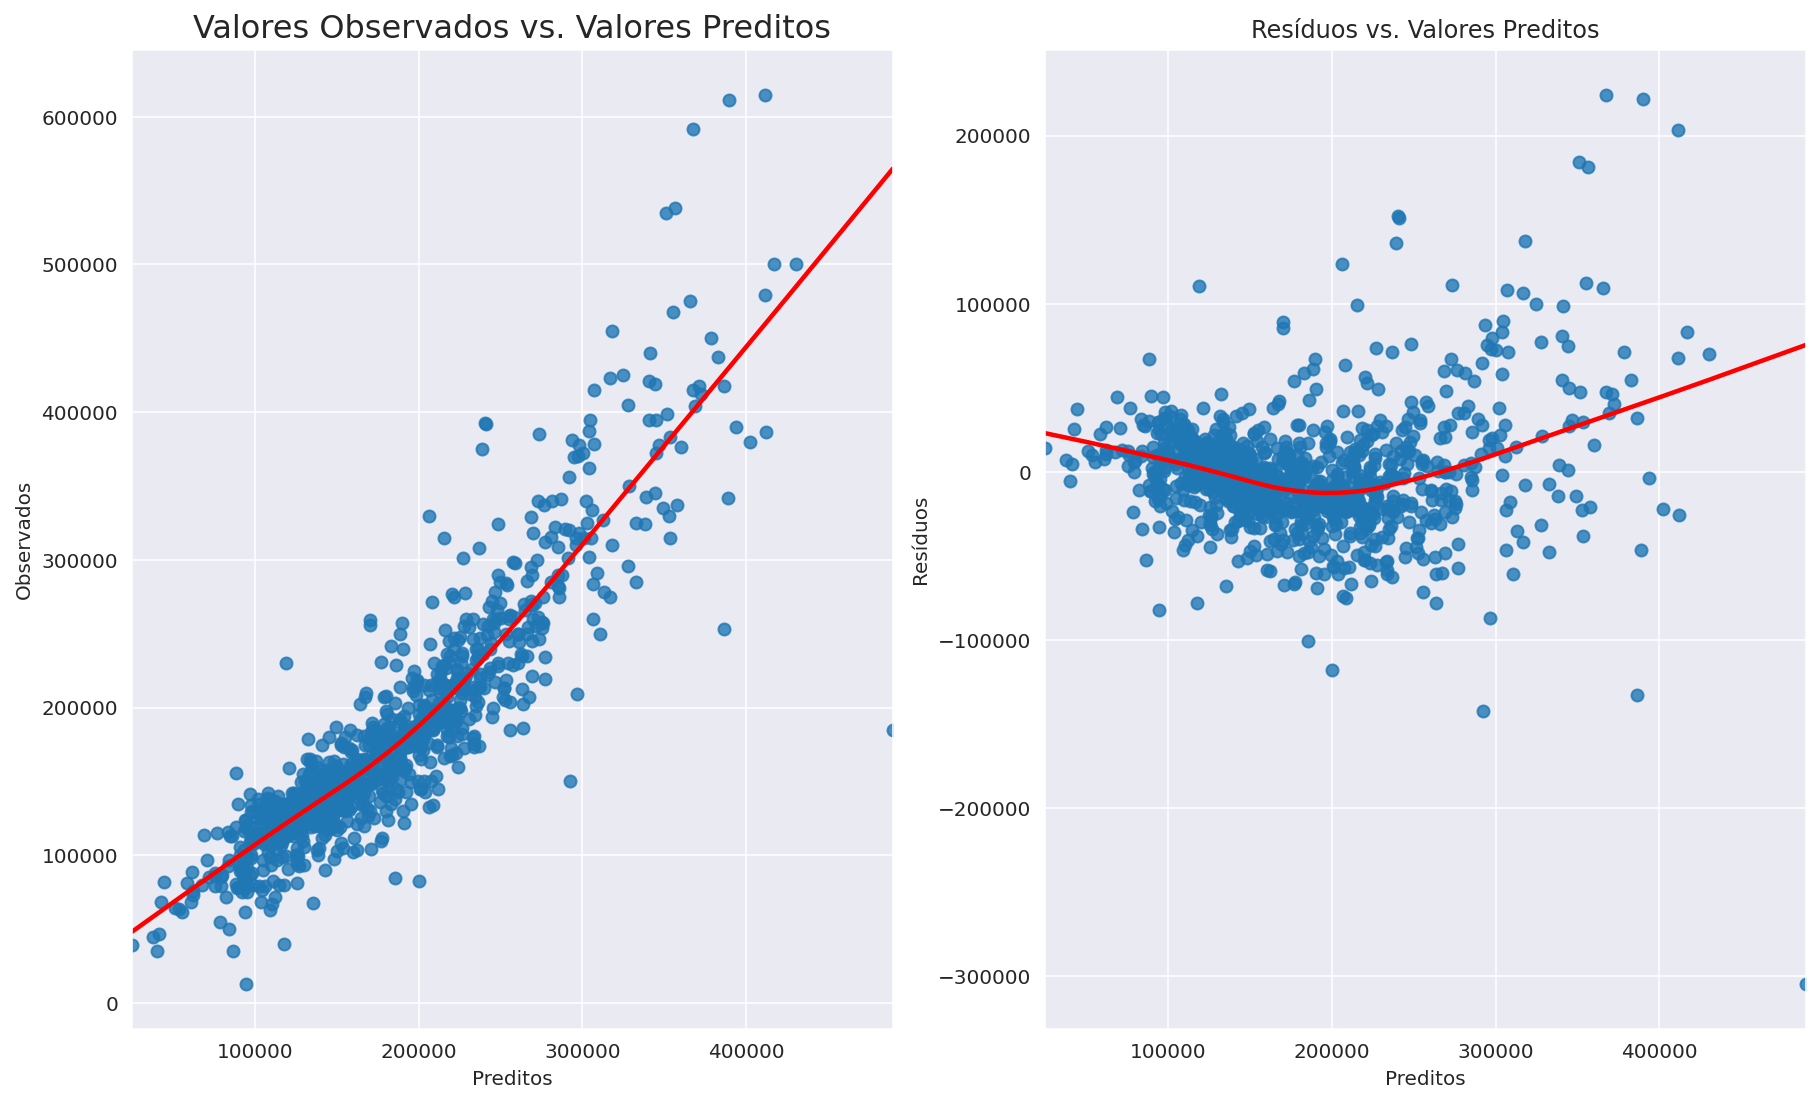

In [120]:
linearity_test(lm_result, y_train)

### Verificar se a média dos resíduos é zero:

(Não, principalmente devido a outliers)

In [124]:
lm_result.resid.mean()

-1476.886482769215

# Remoção das variáveis com p-valor > 0.05

In [133]:
X_train = df_pred[['Overall.Qual',
  'area', 
  'Kitchen.Qual',
  'Total.Bsmt.SF',
  'Garage.Area',
  'MS.Zoning_RM',
  'Foundation_CBlock',
  'Neighborhood_NridgHt',
  'Mas.Vnr.Type_None',
  'Garage.Type_Detchd']].to_numpy()

# Aplicação do modelo novamente

In [134]:
# endog variable : dependent variable 
# exog variables: we do not control them, that is why this name
lm = sm.regression.linear_model.OLS(endog = y_train, exog = X_train)

lm_result = lm.fit()

lm_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                              2838.
Date:                Sat, 27 Feb 2021   Prob (F-statistic):                        0.00
Time:                        09:30:48   Log-Likelihood:                         -11900.
No. Observations:                 998   AIC:                                  2.382e+04
Df Residuals:                     988   BIC:                                  2.387e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1.017e+04   1205.232      8.437      0.000    7803.032    1.25e+04
x2            38.2931      3.024     12.664      0.000      32.359      44.227
x3          8577.0839   2418.163      3.547      0.000    3831.758    1.33e+04
x4            36.9233      3.649     10.119      0.000      29.763      44.084
x5            48.6025      7.062      6.882      0.000      34.745      62.460
x6         -1.627e+04   3561.454     -4.568      0.000   -2.33e+04   -9280.175
x7         -1.992e+04   2304.748     -8.645      0.000   -2.44e+04   -1.54e+04
x8          4.512e+04   5531.505      8.158      0.000    3.43e+04     5.6e+04
x9          -1.17e+04   2483.831     -4.709      0.000   -1.66e+04   -6822.352
x10        -1.519e+04   2991.208     -5.078      0.000   -2.11e+04   -9320.474
==============================================================================
Omnibus:                      305.168   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4781.819
Skew:                           0.962   Prob(JB):                         0.00
Kurtosis:                      13.549   Cond. No.                     9.46e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## The testing trainset must receive every preprocessing the training one received

In [135]:
df_numeric_test = test.drop(columns = prefix, axis = 1)

In [136]:
df_numeric_test.replace(ordinal_dict, inplace = True)

In [137]:
df_numeric_test['ID'] = df_numeric_test.index
df_nominal_test['ID'] = df_nominal_test.index

In [138]:
df_numeric_nominal_test = pd.merge(df_numeric_test, df_nominal_test, on = 'ID')

In [139]:
df_numeric_nominal_test

,area,price,Lot.Area,Lot.Shape,Utilities,Land.Slope,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,...,Garage.Type_Attchd,Garage.Type_Basment,Garage.Type_BuiltIn,Garage.Type_CarPort,Garage.Type_Detchd,Sale.Type_COD,Sale.Type_CWD,Sale.Type_ConLD,Sale.Type_WD,Sale.Condition_Normal
0,2000,305900,10386,3,3,2,8,5,2004,2005,...,1,0,0,0,0,0,0,0,1,1
1,1839,257500,14442,3,3,2,6,7,1957,2004,...,1,0,0,0,0,0,0,0,1,1
2,882,116000,11556,3,3,2,5,6,1952,1952,...,1,0,0,0,0,0,0,0,1,1
3,1152,143450,11700,3,3,2,6,6,1968,1968,...,1,0,0,0,0,0,1,0,0,1
4,1561,277500,7313,3,3,2,9,5,2005,2005,...,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
812,848,143750,4435,3,3,2,6,5,2003,2003,...,1,0,0,0,0,0,0,0,1,1
813,840,87000,4388,2,3,2,5,7,1930,1950,...,0,0,0,0,0,0,0,0,1,1
814,2541,349265,12328,2,3,2,8,5,2005,2005,...,0,0,1,0,0,0,0,0,1,1
815,1682,174000,10400,3,3,2,7,6,1970,1970,...,1,0,0,0,0,0,0,0,1,1


In [140]:
test_nominal_vars = list(df_nominal_test)

In [141]:
train_nominal_vars = nom_vars

In [142]:
train_nominal_vars

['Exterior.2nd_VinylSd',
 'Foundation_PConc',
 'MS.Zoning_RM',
 'Garage.Type_Attchd',
 'Foundation_CBlock',
 'Neighborhood_NridgHt',
 'Mas.Vnr.Type_None',
 'Garage.Type_Detchd',
 'MS.SubClass_60',
 'Exterior.1st_VinylSd']

In [143]:
df_test = df_numeric_nominal_test[pred_vars]

In [144]:
# Drop any missing value
df_test.dropna(inplace = True)

<ipython-input-144-060de4b6695a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.dropna(inplace = True)


In [145]:
df_test.isnull().sum().sum()

0

In [146]:
X_test = df_test.drop('price', axis = 1).to_numpy()
y_test = df_test['price']

In [149]:
X_test = df_test[['Overall.Qual',
  'area', 
  'Kitchen.Qual',
  'Total.Bsmt.SF',
  'Garage.Area',
  'MS.Zoning_RM',
  'Foundation_CBlock',
  'Neighborhood_NridgHt',
  'Mas.Vnr.Type_None',
  'Garage.Type_Detchd']].to_numpy()

In [150]:
prediction = lm_result.predict(X_test)

In [151]:
from sklearn.metrics import r2_score

# Determination Coefficient Metrics to evaluate model performance

In [152]:
round(r2_score(y_true = y_test, y_pred = prediction),2)

0.81

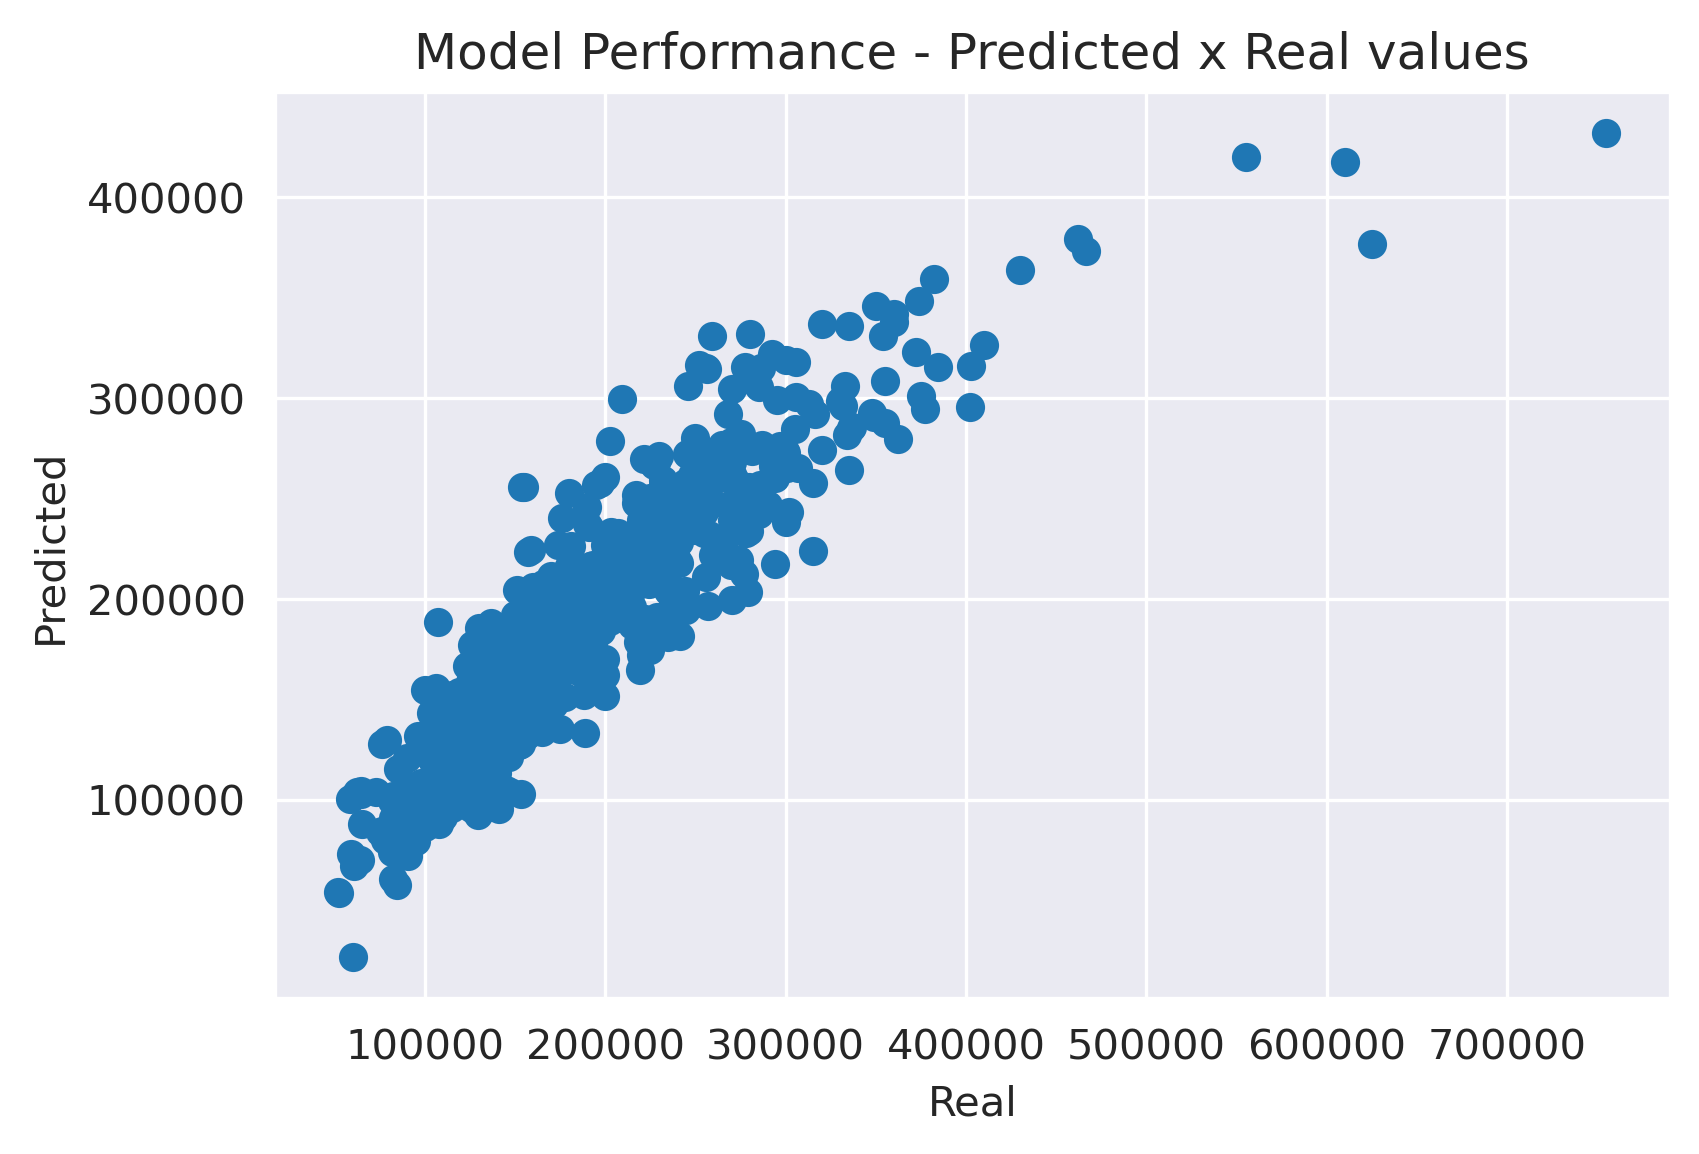

In [153]:
plt.figure(figsize = (6,4), dpi = 150)
plt.scatter(y = lm_result.predict(X_test),x = y_test)
plt.xlabel('Real')
plt.ylabel('Predicted')
plt.title('Model Performance - Predicted x Real values')
plt.show()

It's possible to notice how there are outliers real values which make it difficult to the model to learn every point

In this case, we can separate the trainsets into two, and create two algorithms to predict each partition

### Outliers Visualization with Histogram and Distplot:

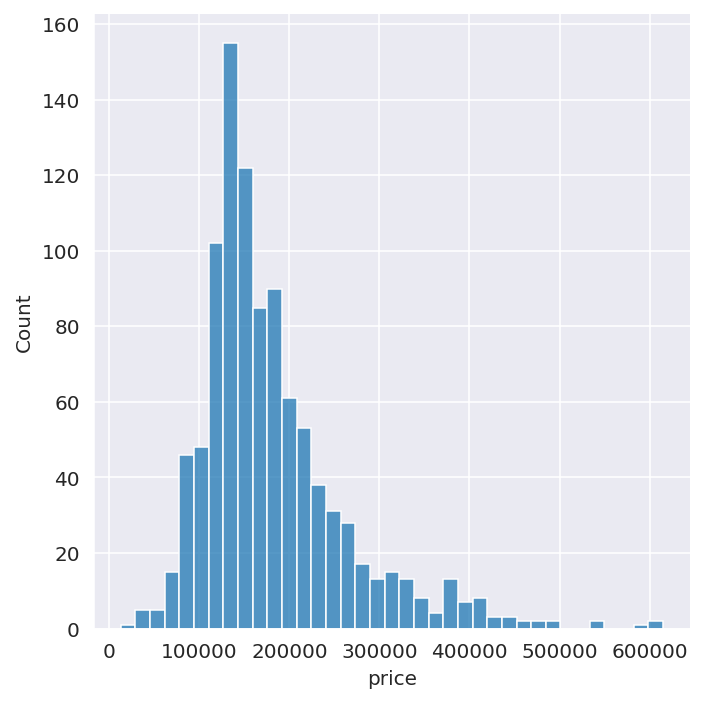

In [154]:
sns.displot(train['price'])
plt.show()

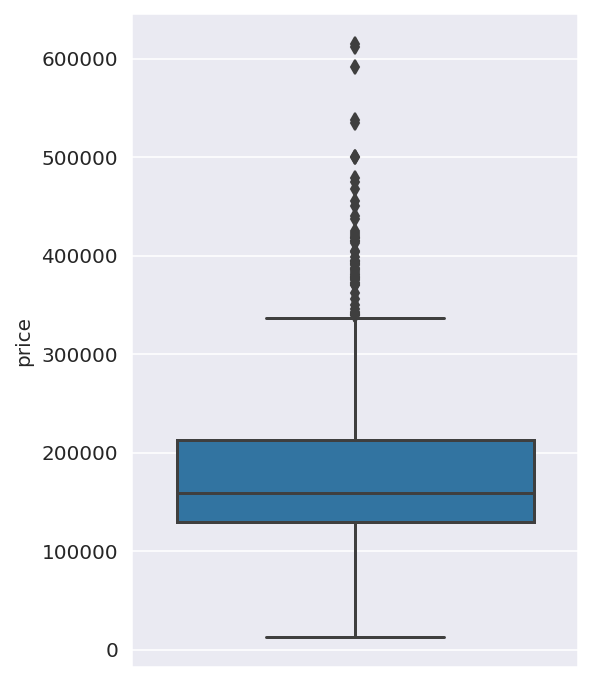

In [155]:
plt.figure(figsize = (4,6))
sns.boxplot(y = train['price'])
plt.show()

###

In [156]:
df_pred['price'].describe()

count       998.000000
mean     181322.812625
std       81922.283700
min       12789.000000
25%      129862.500000
50%      159500.000000
75%      213000.000000
max      615000.000000
Name: price, dtype: float64

In [157]:
[lb,ub] = [df_pred['price'].mean() - 3*df_pred['price'].std(),df_pred['price'].mean() + 3*df_pred['price'].std()]

In [158]:
lb

-64444.038475237205

In [159]:
ub

427089.6637257382

In [160]:
df_pred = df_pred[(df_pred['price'] > lb) & (df_pred['price'] < ub)]

In [161]:
df_pred['price'].describe()

count       984.000000
mean     176691.700203
std       72286.099609
min       12789.000000
25%      129437.500000
50%      159000.000000
75%      210000.000000
max      425000.000000
Name: price, dtype: float64

/home/hadoop/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

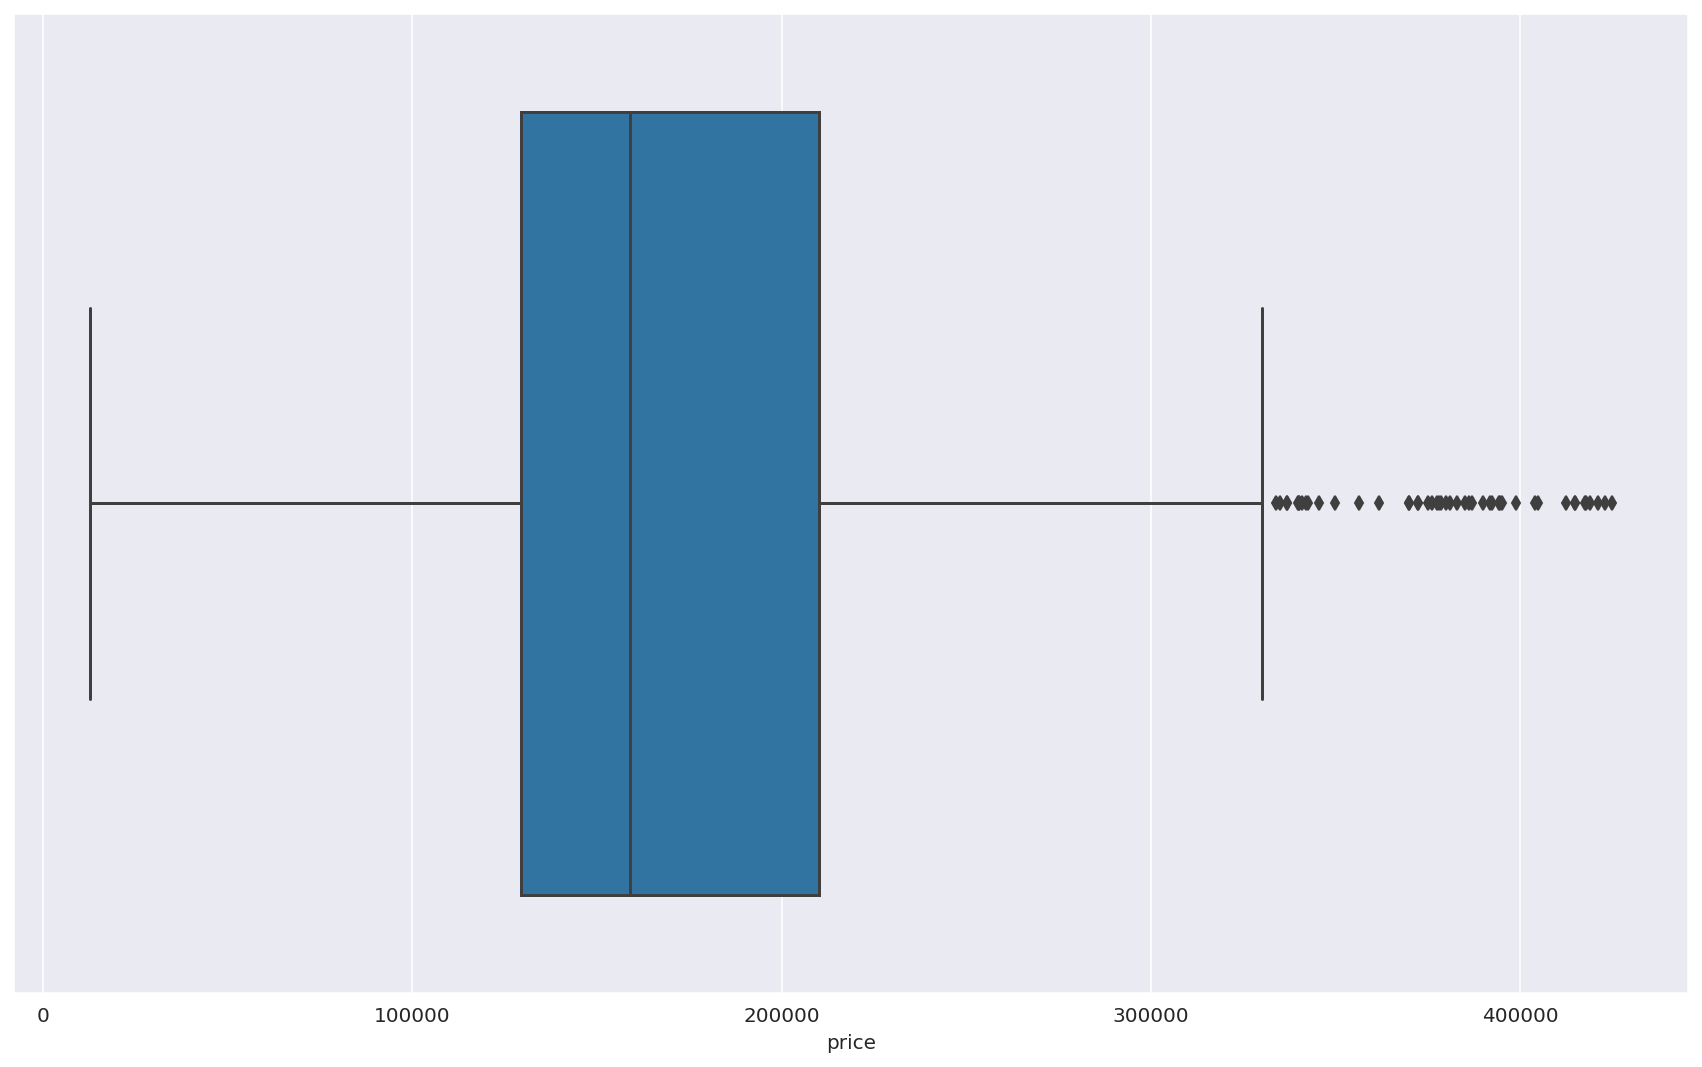

In [162]:
sns.boxplot(df_pred['price'])

# Training

In [171]:
y_train = df_pred[y_var].to_numpy()

X_train = df_pred[X_var].to_numpy()

X_train = df_pred[['Overall.Qual',
  'area', 
  'Kitchen.Qual',
  'Total.Bsmt.SF',
  'Garage.Area',
  'MS.Zoning_RM',
  'Foundation_CBlock',
  'Neighborhood_NridgHt',
  'Mas.Vnr.Type_None',
  'Garage.Type_Detchd']].to_numpy()

# endog variable : dependent variable 
# exog variables: we do not control them, that is why this name
lm = sm.regression.linear_model.OLS(endog = y_train, exog = X_train)

lm_result = lm.fit()

lm_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              3434.
Date:                Sat, 27 Feb 2021   Prob (F-statistic):                        0.00
Time:                        09:34:05   Log-Likelihood:                         -11595.
No. Observations:                 984   AIC:                                  2.321e+04
Df Residuals:                     974   BIC:                                  2.326e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1.118e+04   1055.266     10.596      0.000    9110.623    1.33e+04
x2            36.7730      2.649     13.883      0.000      31.575      41.971
x3          9503.3178   2109.586      4.505      0.000    5363.461    1.36e+04
x4            27.5648      3.238      8.512      0.000      21.210      33.920
x5            46.4228      6.194      7.494      0.000      34.267      58.578
x6         -1.741e+04   3097.072     -5.621      0.000   -2.35e+04   -1.13e+04
x7          -1.69e+04   2011.247     -8.403      0.000   -2.08e+04    -1.3e+04
x8          3.453e+04   5078.196      6.800      0.000    2.46e+04    4.45e+04
x9         -8901.3808   2167.439     -4.107      0.000   -1.32e+04   -4647.993
x10        -1.539e+04   2599.263     -5.920      0.000   -2.05e+04   -1.03e+04
==============================================================================
Omnibus:                      174.700   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2646.815
Skew:                           0.295   Prob(JB):                         0.00
Kurtosis:                      11.013   Cond. No.                     9.77e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Testing train

In [172]:
[lb,ub] = [df_test['price'].mean() - 3*df_test['price'].std(),df_test['price'].mean() + 3*df_test['price'].std()]

df_test = df_test[(df_test['price'] > lb) & (df_test['price'] < ub)]

In [173]:
# Drop any missing value
df_test.dropna(inplace = True)

df_test.isnull().sum().sum()

X_test = df_test.drop('price', axis = 1).to_numpy()
y_test = df_test['price']

X_test = df_test[['Overall.Qual',
  'area', 
  'Kitchen.Qual',
  'Total.Bsmt.SF',
  'Garage.Area',
  'MS.Zoning_RM',
  'Foundation_CBlock',
  'Neighborhood_NridgHt',
  'Mas.Vnr.Type_None',
  'Garage.Type_Detchd']].to_numpy()

In [174]:
prediction = lm_result.predict(X_test)

from sklearn.metrics import r2_score

# Determination Coefficient Metrics to evaluate model performance

round(r2_score(y_true = y_test, y_pred = prediction),2)

0.83

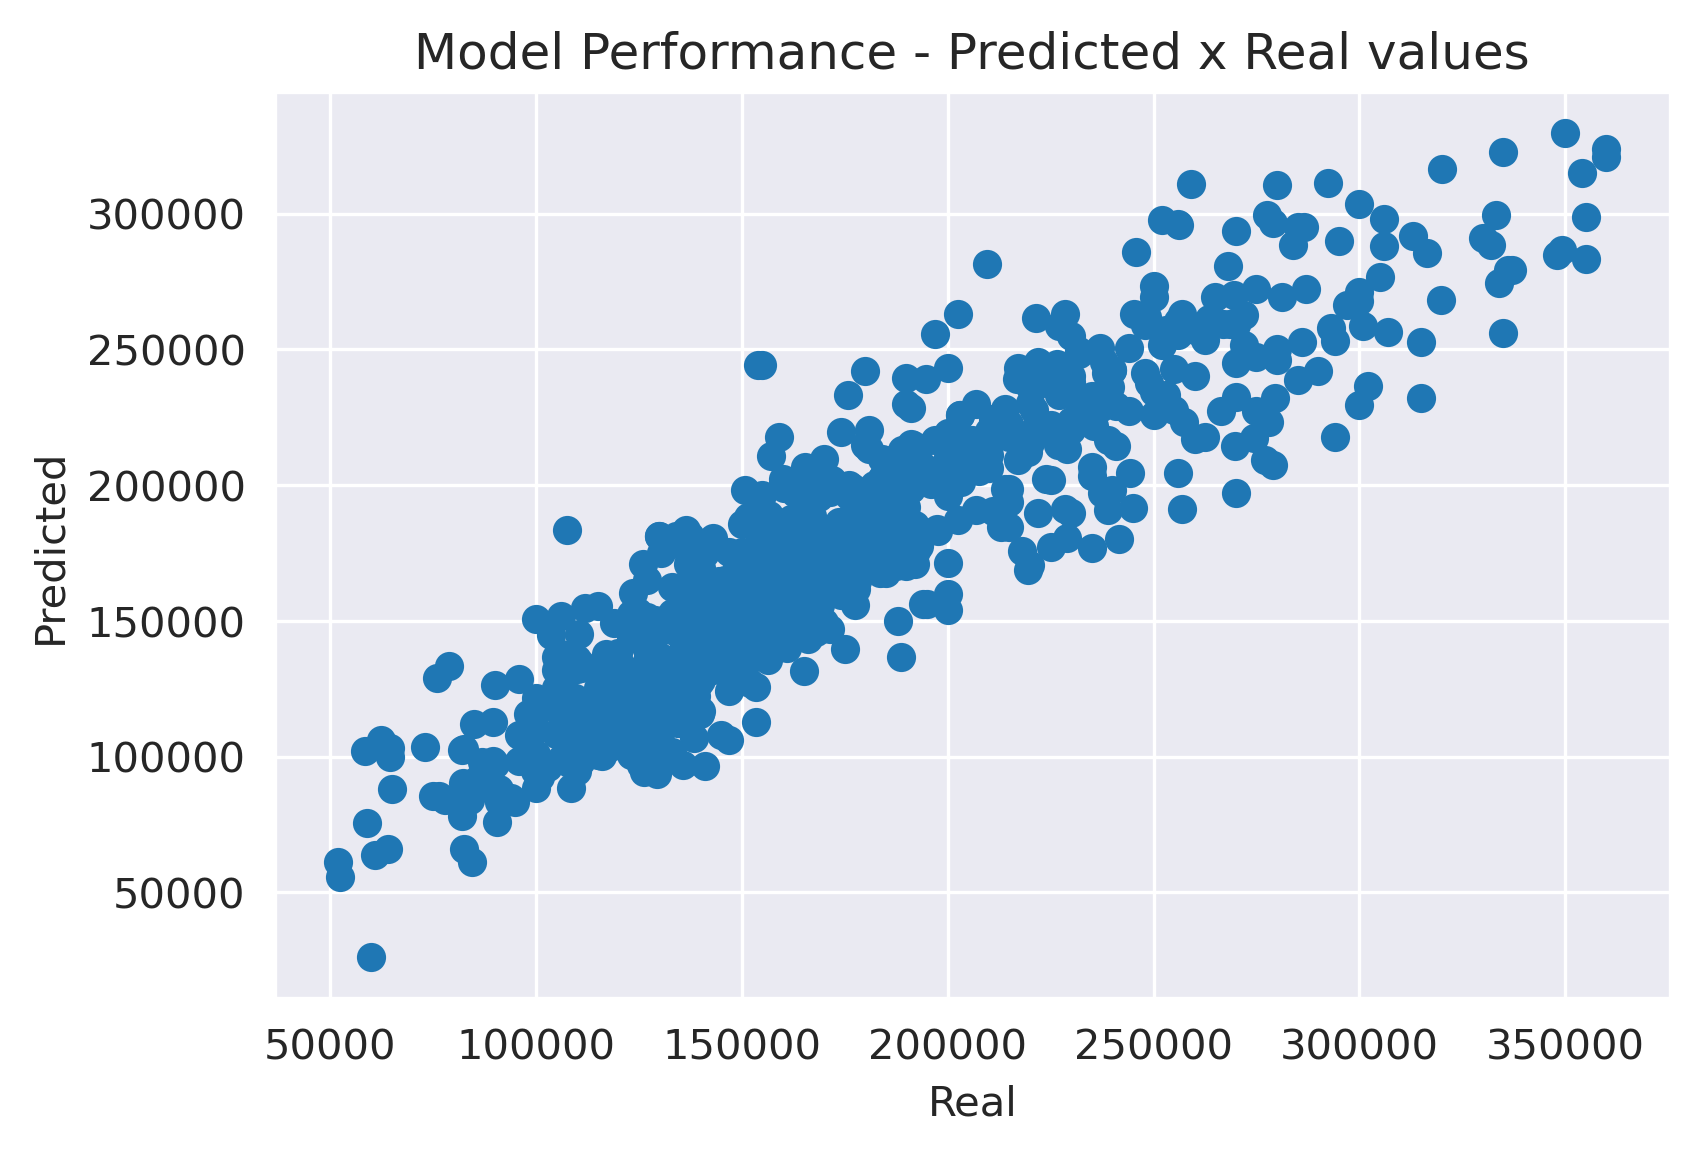

In [175]:
plt.figure(figsize = (6,4), dpi = 150)
plt.scatter(y = lm_result.predict(X_test),x = y_test)
plt.xlabel('Real')
plt.ylabel('Predicted')
plt.title('Model Performance - Predicted x Real values')
plt.show()

# Random Forest

In [176]:
from sklearn.ensemble import RandomForestRegressor

In [177]:
rf = RandomForestRegressor(n_estimators = 100, 
                          criterion = 'mse', 
                          max_depth= 10)

In [178]:
rf.fit(X = X_train,y = y_train)

RandomForestRegressor(max_depth=10)

In [179]:
prediction = rf.predict(X_test)

from sklearn.metrics import r2_score

# Determination Coefficient Metrics to evaluate model performance

round(r2_score(y_true = y_test, y_pred = prediction),2)

0.86

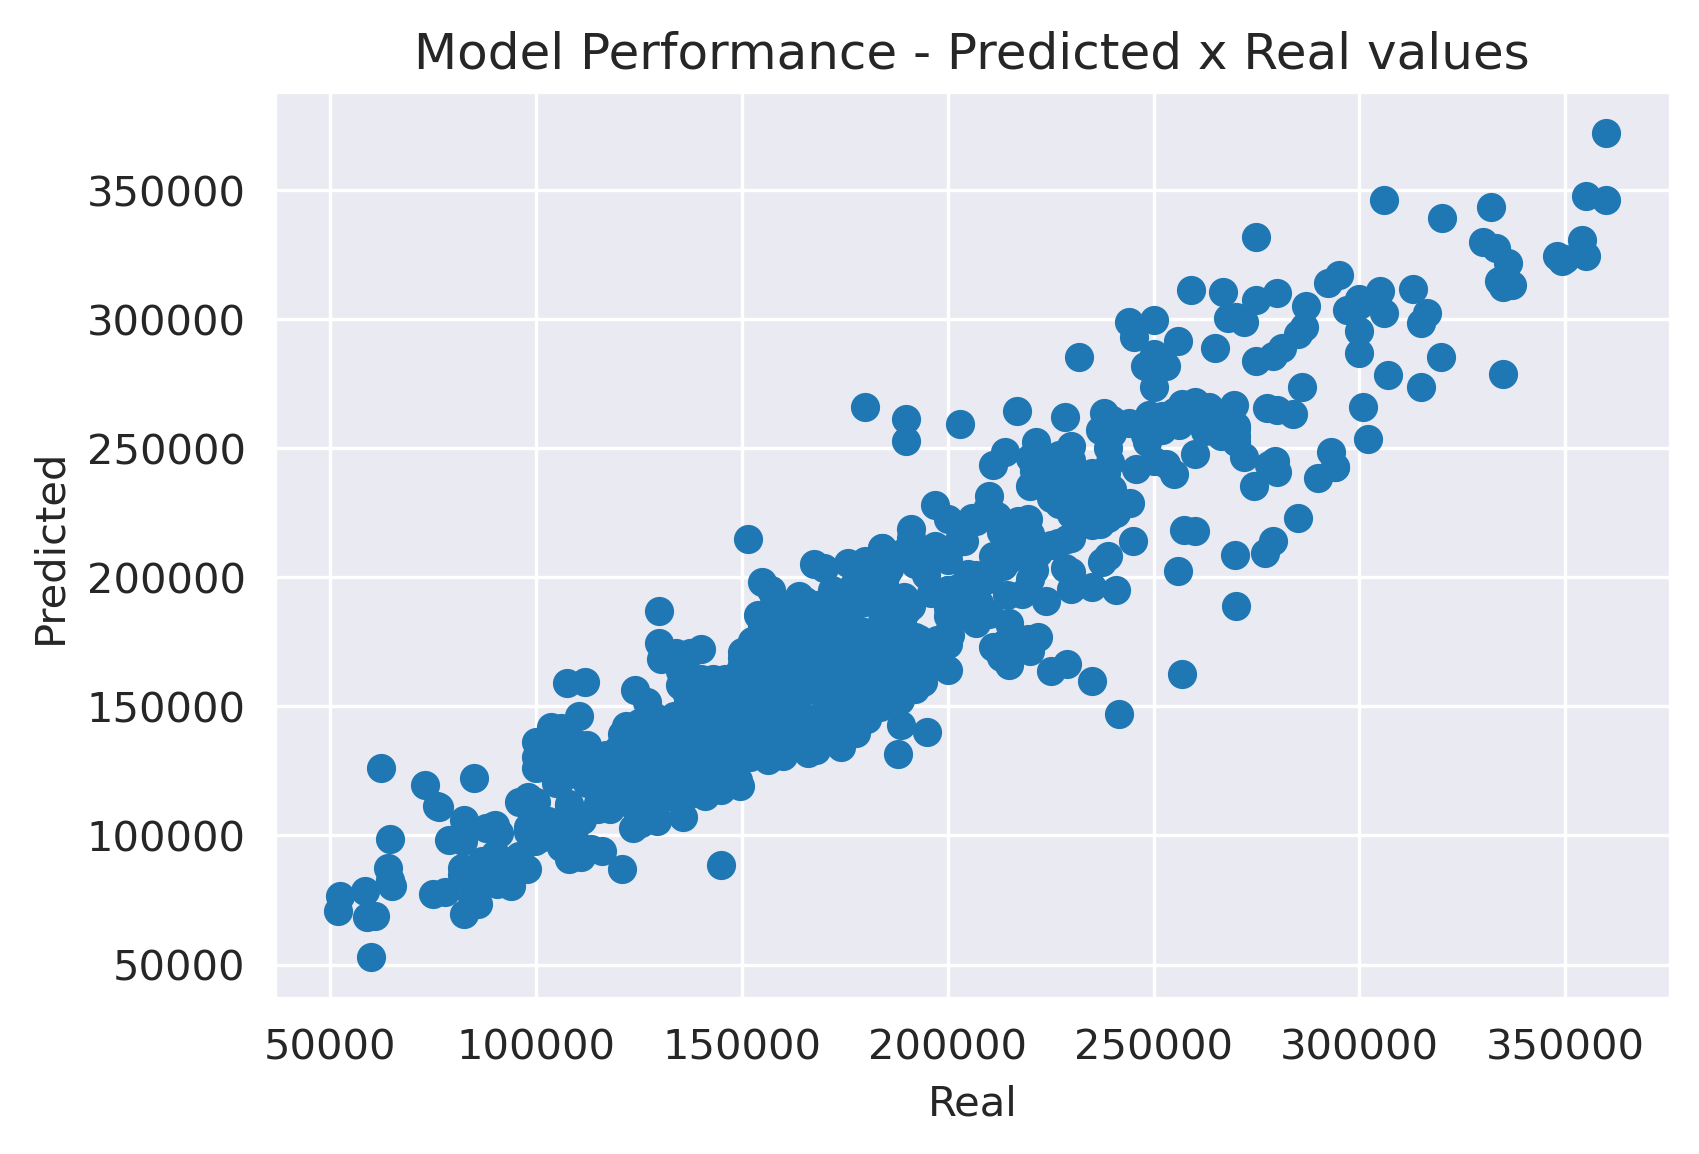

In [180]:
plt.figure(figsize = (6,4), dpi = 150)
plt.scatter(y = rf.predict(X_test),x = y_test)
plt.xlabel('Real')
plt.ylabel('Predicted')
plt.title('Model Performance - Predicted x Real values')
plt.show()

# Further approaches include:

• Use Lasso and/or Ridge Regularization for linear regression to diminish variance introducing a bias

• Use SVM for regression 

• Test Neural Network with activation functions such as ReLu, Leaky ReLy and on the output layer the linear function

• Also make use of more feature selection methods, such as to use more or less variables as predictors according to correlation coefficients and also make use of randomforest to select the best predictors

• Lastly, a tuning script can be written to find the best parameters which increase the model performances